Warning message:
"package 'tseries' was built under R version 4.4.1"
Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 

Warning message:
"package 'forecast' was built under R version 4.4.1"
Warning message:
"package 'ggplot2' was built under R version 4.4.1"


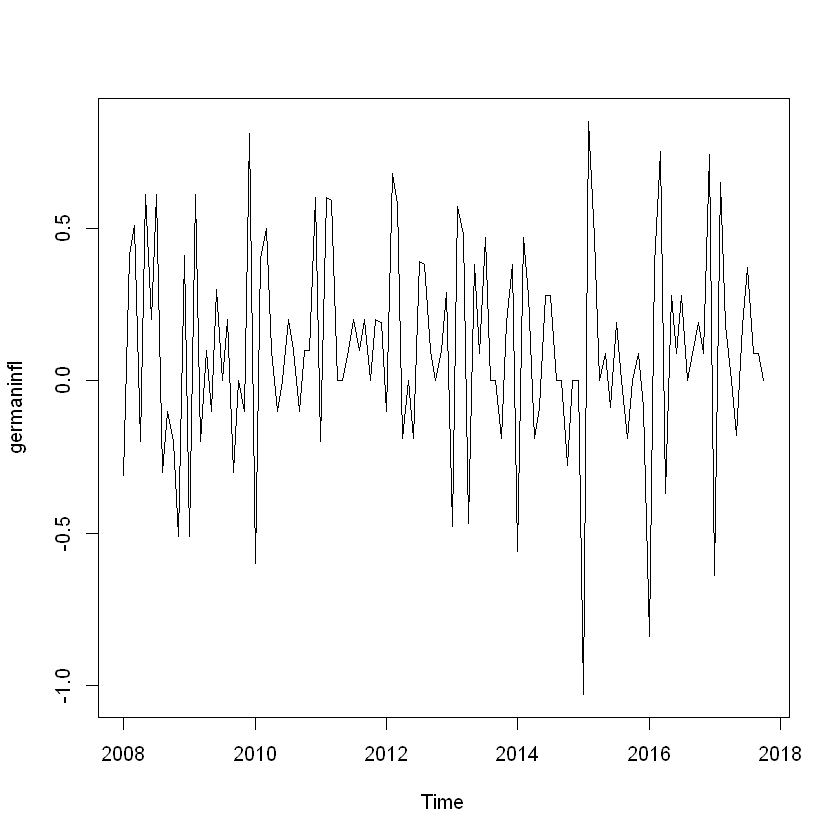

In [1]:
# The goal is to conduct time series analysis with seasonality as a factor in the data.
# Copy pasted values from https://www.statbureau.org/en/germany/inflation-tables
library(tseries)
library(forecast)
library(ggplot2)
data <- c(-0.31, 0.41, 0.51, -0.20, 0.61, 0.20, 0.61, -0.30, -0.10, -0.20, -0.51, 0.41,-0.51, 0.61, -0.20, 0.10, -0.10, 0.30, 0.00, 0.20, -0.30, 0.00, -0.10, 0.81,-0.60, 0.40, 0.50, 0.10, -0.10, 0.00, 0.20, 0.10, -0.10, 0.10, 0.10, 0.60,-0.20, 0.60, 0.59, 0.00, 0.00, 0.10, 0.20, 0.10, 0.20, 0.00, 0.20, 0.19,-0.10, 0.68, 0.58, -0.19, 0.00, -0.19, 0.39, 0.38, 0.10, 0.00, 0.10, 0.29,-0.48, 0.57, 0.48, -0.47, 0.38, 0.09, 0.47, 0.00, 0.00, -0.19, 0.19, 0.38,-0.56, 0.47, 0.28, -0.19, -0.09, 0.28, 0.28, 0.00, 0.00, -0.28, 0.00, 0.00,-1.03, 0.85, 0.47, 0.00, 0.09, -0.09, 0.19, 0.00, -0.19, 0.00, 0.09, -0.09,-0.84, 0.38, 0.75, -0.37, 0.28, 0.09, 0.28, 0.00, 0.09, 0.19, 0.09, 0.74,-0.64, 0.65, 0.18, 0.00,-0.18, 0.18, 0.37, 0.09, 0.09, 0.00)
germaninfl <- ts(data, start = 2008, frequency = 12)
plot(germaninfl)


$x
       Jan   Feb   Mar   Apr   May   Jun   Jul   Aug   Sep   Oct   Nov   Dec
2008 -0.31  0.41  0.51 -0.20  0.61  0.20  0.61 -0.30 -0.10 -0.20 -0.51  0.41
2009 -0.51  0.61 -0.20  0.10 -0.10  0.30  0.00  0.20 -0.30  0.00 -0.10  0.81
2010 -0.60  0.40  0.50  0.10 -0.10  0.00  0.20  0.10 -0.10  0.10  0.10  0.60
2011 -0.20  0.60  0.59  0.00  0.00  0.10  0.20  0.10  0.20  0.00  0.20  0.19
2012 -0.10  0.68  0.58 -0.19  0.00 -0.19  0.39  0.38  0.10  0.00  0.10  0.29
2013 -0.48  0.57  0.48 -0.47  0.38  0.09  0.47  0.00  0.00 -0.19  0.19  0.38
2014 -0.56  0.47  0.28 -0.19 -0.09  0.28  0.28  0.00  0.00 -0.28  0.00  0.00
2015 -1.03  0.85  0.47  0.00  0.09 -0.09  0.19  0.00 -0.19  0.00  0.09 -0.09
2016 -0.84  0.38  0.75 -0.37  0.28  0.09  0.28  0.00  0.09  0.19  0.09  0.74
2017 -0.64  0.65  0.18  0.00 -0.18  0.18  0.37  0.09  0.09  0.00            

$seasonal
             Jan         Feb         Mar         Apr         May         Jun
2008 -0.63783324  0.49147232  0.31323158 -0.20524064 -0.034083

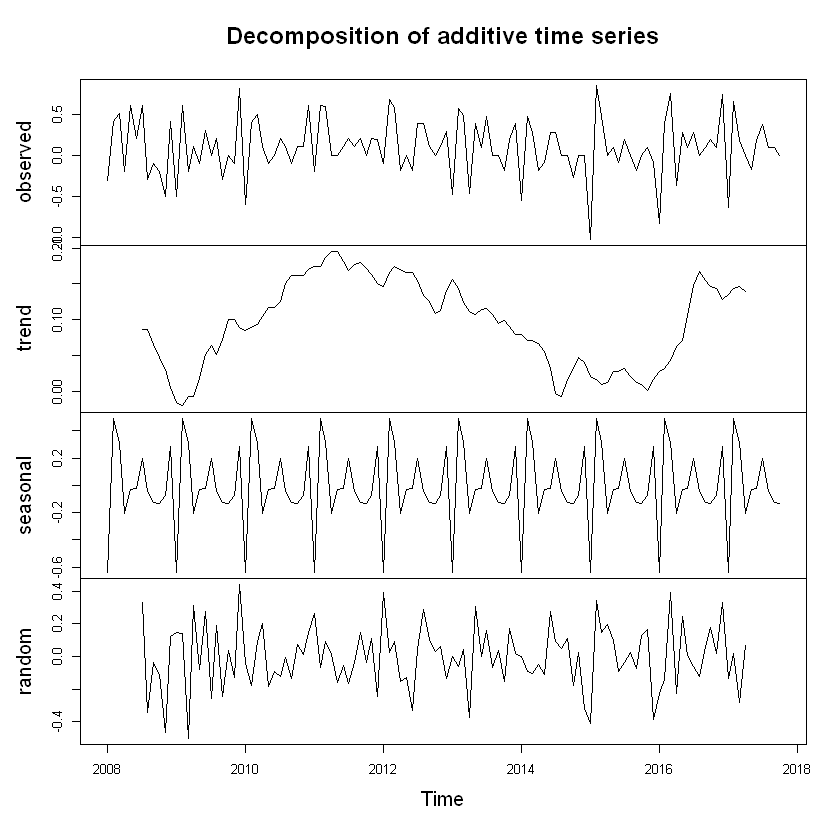

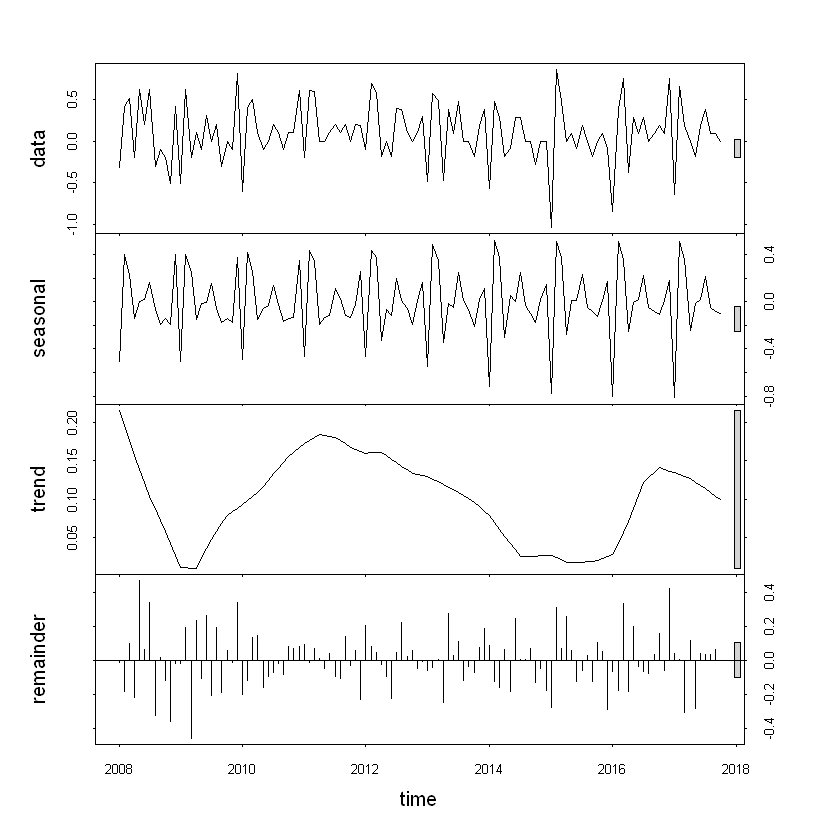

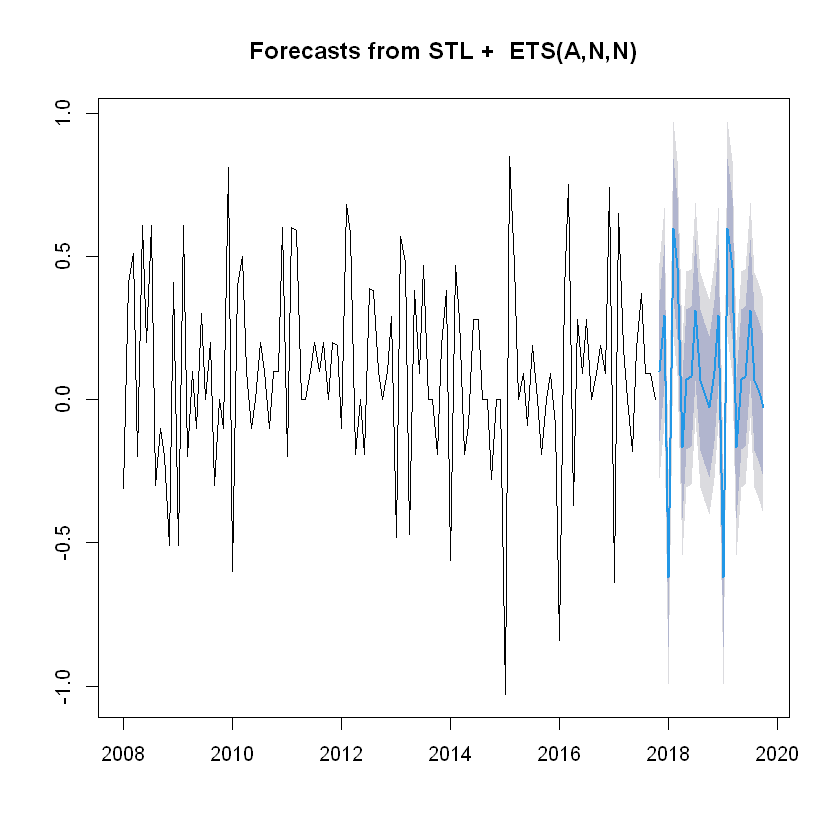

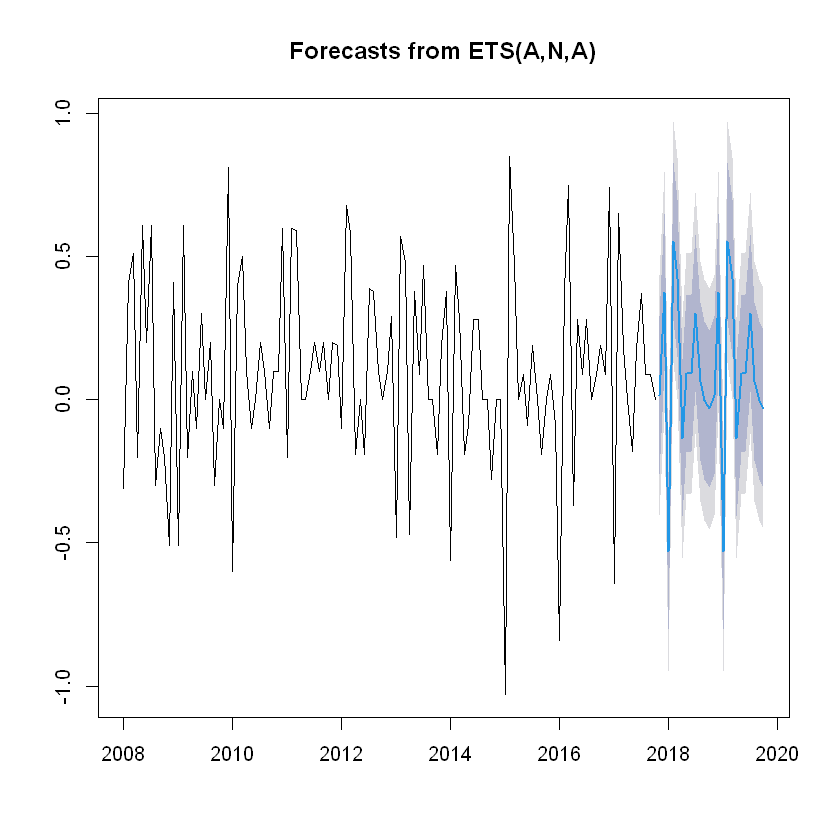

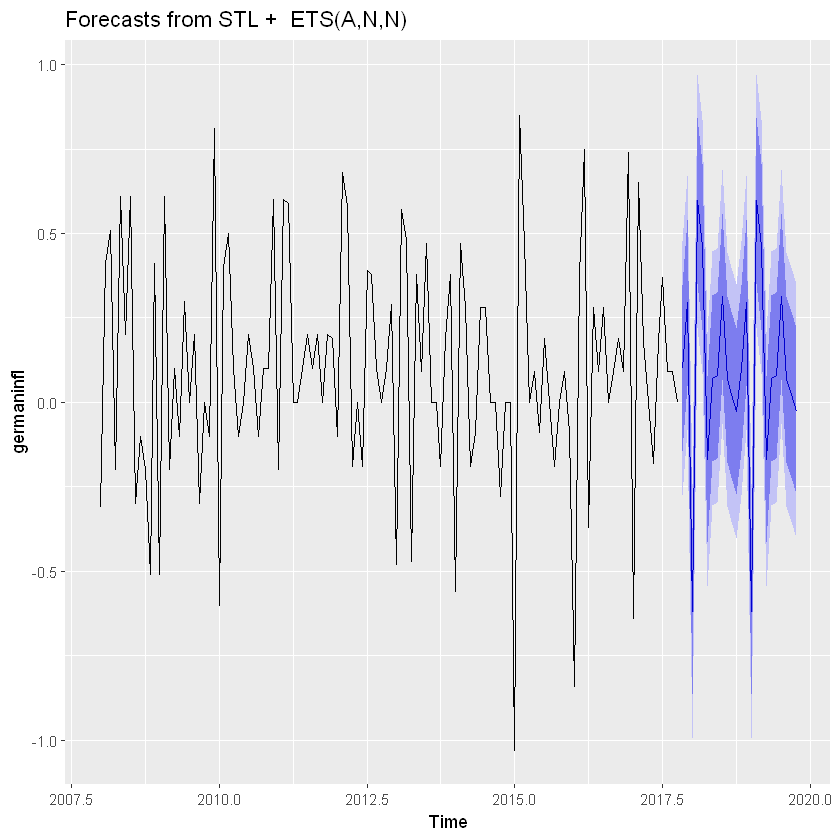

In [2]:
# Seasonal Decomposition
decompose(germaninfl)

plot(decompose(germaninfl))

# Using the stl method
plot(stl(germaninfl, s.window = 7))

# stl forecasting
plot(stlf(germaninfl, method = "ets"))

# comparison with a standard ets forecast
plot(forecast(ets(germaninfl), h = 24))

# using autoplot
autoplot(stlf(germaninfl, method = "ets"))


 ARIMA(2,0,2)(1,1,1)[12] with drift         : Inf
 ARIMA(0,0,0)(0,1,0)[12] with drift         : 31.97975
 ARIMA(1,0,0)(1,1,0)[12] with drift         : 22.54641
 ARIMA(0,0,1)(0,1,1)[12] with drift         : 6.801819
 ARIMA(0,0,0)(0,1,0)[12]                    : 29.92568
 ARIMA(0,0,1)(0,1,0)[12] with drift         : 29.30375
 ARIMA(0,0,1)(1,1,1)[12] with drift         : Inf
 ARIMA(0,0,1)(0,1,2)[12] with drift         : Inf
 ARIMA(0,0,1)(1,1,0)[12] with drift         : 23.5733
 ARIMA(0,0,1)(1,1,2)[12] with drift         : Inf
 ARIMA(0,0,0)(0,1,1)[12] with drift         : 5.572693
 ARIMA(0,0,0)(1,1,1)[12] with drift         : Inf
 ARIMA(0,0,0)(0,1,2)[12] with drift         : Inf
 ARIMA(0,0,0)(1,1,0)[12] with drift         : 23.12354
 ARIMA(0,0,0)(1,1,2)[12] with drift         : Inf
 ARIMA(1,0,0)(0,1,1)[12] with drift         : 6.386517
 ARIMA(1,0,1)(0,1,1)[12] with drift         : 1.682708
 ARIMA(1,0,1)(0,1,0)[12] with drift         : 22.07834
 ARIMA(1,0,1)(1,1,1)[12] with drift         :

Series: germaninfl 
ARIMA(1,0,2)(0,1,1)[12] 

Coefficients:
          ar1     ma1     ma2     sma1
      -0.7947  0.7786  0.2115  -0.7618
s.e.   0.1201  0.1469  0.1013   0.1291

sigma^2 = 0.04883:  log likelihood = 6.38
AIC=-2.77   AICc=-2.17   BIC=10.55


 ARIMA(2,0,2)(1,1,1)[12] with drift         : Inf
 ARIMA(0,0,0)(0,1,0)[12] with drift         : 31.97975
 ARIMA(1,0,0)(1,1,0)[12] with drift         : 22.54641
 ARIMA(0,0,1)(0,1,1)[12] with drift         : 6.801819
 ARIMA(0,0,0)(0,1,0)[12]                    : 29.92568
 ARIMA(0,0,1)(0,1,0)[12] with drift         : 29.30375
 ARIMA(0,0,1)(1,1,1)[12] with drift         : Inf
 ARIMA(0,0,1)(0,1,2)[12] with drift         : Inf
 ARIMA(0,0,1)(1,1,0)[12] with drift         : 23.5733
 ARIMA(0,0,1)(1,1,2)[12] with drift         : Inf
 ARIMA(0,0,0)(0,1,1)[12] with drift         : 5.572693
 ARIMA(0,0,0)(1,1,1)[12] with drift         : Inf
 ARIMA(0,0,0)(0,1,2)[12] with drift         : Inf
 ARIMA(0,0,0)(1,1,0)[12] with drift         : 23.12354
 ARIMA(0,0,0)(1,1,2)[12] with drift         : Inf
 ARIMA(1,0,0)(0,1,1)[12] with drift         : 6.386517
 ARIMA(1,0,1)(0,1,1)[12] with drift         : 1.682708
 ARIMA(1,0,1)(0,1,0)[12] with drift         : 22.07834
 ARIMA(1,0,1)(1,1,1)[12] with drift         :

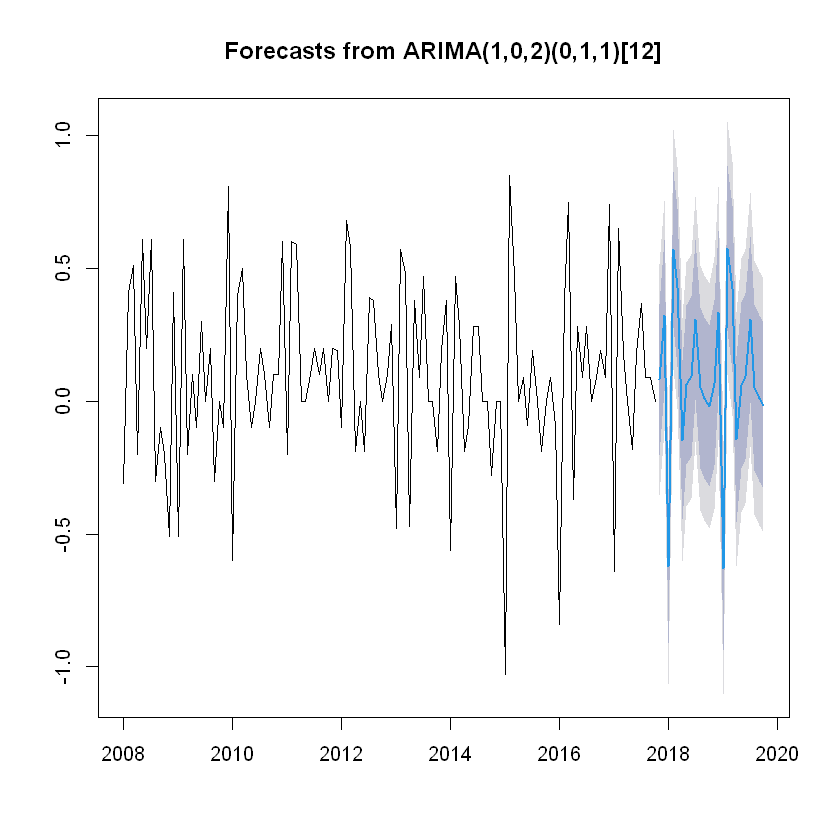

In [3]:
## Seasonal Arima (package forecast)
auto.arima(germaninfl,
    stepwise = T,
    approximation = F, trace = T
)

# Getting an object
germaninflarima <- auto.arima(germaninfl,
    stepwise = T,
    approximation = F,
    trace = T
)

# Forecast
forec <- forecast(germaninflarima)
plot(forec)


ETS(A,N,A) 

Call:
ets(y = germaninfl)

  Smoothing parameters:
    alpha = 1e-04 
    gamma = 1e-04 

  Initial states:
    l = 0.1021 
    s = 0.2741 -0.0868 -0.1336 -0.1038 -0.0377 0.2009
           -0.0085 -0.0111 -0.2365 0.323 0.4503 -0.6303

  sigma:  0.2145

     AIC     AICc      BIC 
214.7276 219.4335 256.2878 

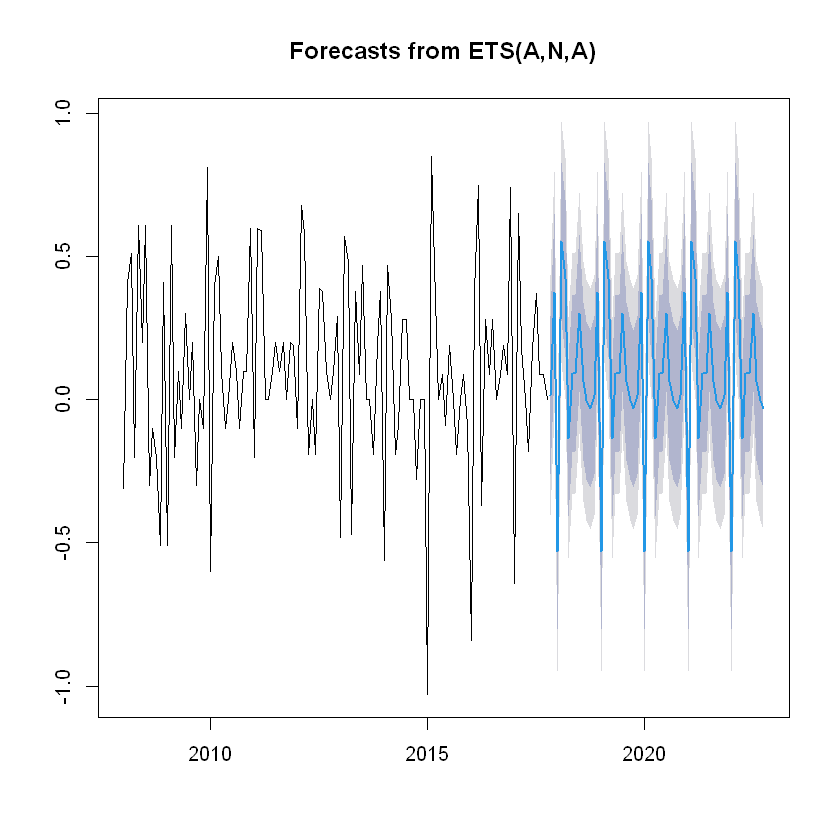

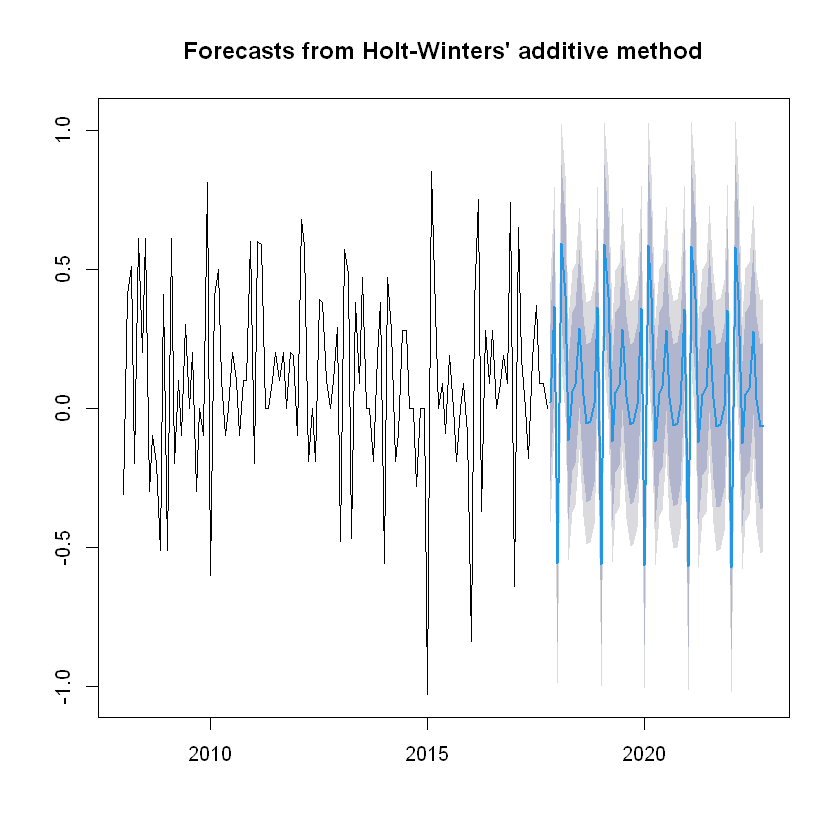

In [4]:
## Exponential Smoothing with ets
# Auto generated
ets(germaninfl)
# Forecast plot
germaninflets <- ets(germaninfl)

plot(forecast(germaninflets, h = 60))

# Comparison with seasonal Holt Winters model
plot(hw(germaninfl, h = 60))


In [5]:
# Time Series Cross Validation
forecastets <- function(x, h) {
    forecast(ets(x), h = h)
}

forecastarima <- function(x, h) {
    forecast(auto.arima(x), stepwise = T, approximation = F, h = h)
}

etserror <- tsCV(germaninfl, forecastets, h = 1)
arimaerror <- tsCV(germaninfl, forecastarima, h = 1)

mean(etserror^2, na.rm = TRUE)
mean(arimaerror^2, na.rm = TRUE)
# Arima model has a lower RMSE, so it is the better fit.

[1] 0.09073782

[1] 0.07700064